In [21]:
import numpy as np
import scipy.stats as stats
import sklearn
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

#Team Contract
#Decide one a Stakeholder
#EDA
#Plot, look into outliers,nulls
#Decide which predictors to use for the single model and the other model 


In [2]:
df = pd.read_csv('kc_house_data.csv')

In [3]:
# exploratory
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [4]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df['view'].value_counts()

NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: view, dtype: int64

In [12]:
views = df['view'].dropna()

In [57]:
con = df['condition']
con

0          Average
1          Average
2          Average
3        Very Good
4          Average
           ...    
21592      Average
21593      Average
21594      Average
21595      Average
21596      Average
Name: condition, Length: 21597, dtype: object

In [58]:
cond = pd.get_dummies(con).drop('Average', axis=1)
cond

,Fair,Good,Poor,Very Good
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,1
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [15]:
view = pd.get_dummies(views)

In [16]:
view.value_counts()

AVERAGE  EXCELLENT  FAIR  GOOD  NONE
0        0          0     0     1       19422
1        0          0     0     0         957
0        0          0     1     0         508
                    1     0     0         330
         1          0     0     0         317
dtype: int64

In [17]:
view = view.drop(['NONE'], axis=1)

In [18]:
view

,AVERAGE,EXCELLENT,FAIR,GOOD
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0
3,0,0,0,0
4,0,0,0,0
...,...,...,...,...
21592,0,0,0,0
21593,0,0,0,0
21594,0,0,0,0
21595,0,0,0,0


In [20]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [79]:
df_x = df[['yr_built', 'sqft_living', 'sqft_living15', 'sqft_above', 'bathrooms', 'bedrooms', 'price', 'condition']]

In [80]:
df_w_views = pd.concat([df_x, view], axis=1)
df_w_views.corr()
new_df = pd.concat([df_w_views, cond], axis=1)
new_df.head()
new_df = new_df.drop('condition', axis=1)
new_df.head()


,yr_built,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,price,AVERAGE,EXCELLENT,FAIR,GOOD,Fair,Good,Poor,Very Good
0,1955,1180,1340,1180,1.00,3,221900.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1951,2570,1690,2170,2.25,3,538000.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1933,770,2720,770,1.00,2,180000.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1965,1960,1360,1050,3.00,4,604000.0,0.0,0.0,0.0,0.0,0,0,0,1
4,1987,1680,1800,1680,2.00,3,510000.0,0.0,0.0,0.0,0.0,0,0,0,0


In [81]:
new_df = new_df.dropna()

In [82]:
model = sm.OLS(new_df['price'], sm.add_constant(new_df.drop('price', axis=1)))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.595
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     2262.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        14:51:58   Log-Likelihood:            -2.9667e+05
No. Observations:               21534   AIC:                         5.934e+05
Df Residuals:                   21519   BIC:                         5.935e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          5.796e+06   1.39e+05     41.779      0.000    5.52e+06    6.07e+06
yr_built      -2985.6466     71.492    -41.762      0.000   -3125.775   -2845.518
sqft_living     197.9080      4.740     41.757      0.000     188.618     207.198
sqft_living15    66.9850      3.704     18.084      0.000      59.725      74.245
sqft_above       46.2392      4.385     10.546      0.000      37.645      54.833
bathrooms      8.103e+04   3579.763     22.634      0.000     7.4e+04     8.8e+04
bedrooms      -5.609e+04   2162.584    -25.935      0.000   -6.03e+04   -5.18e+04
AVERAGE        7.772e+04   7923.692      9.809      0.000    6.22e+04    9.33e+04
EXCELLENT      5.334e+05   1.36e+04     39.197      0.000    5.07e+05     5.6e+05
FAIR           1.229e+05   1.31e+04      9.398      0.000    9.73e+04    1.49e+05
GOOD           1.544e+05   1.08e+04     14.280      0.000    1.33e+05    1.76e+05
Fair          -5.634e+04   1.81e+04     -3.115      0.002   -9.18e+04   -2.09e+04
Good           -650.1720   3905.473     -0.166      0.868   -8305.190    7004.846
Poor          -1.102e+05   4.34e+04     -2.537      0.011   -1.95e+05   -2.51e+04
Very Good      3.825e+04   6357.923      6.016      0.000    2.58e+04    5.07e+04
==============================================================================
Omnibus:                    14090.219   Durbin-Watson:                   1.974
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           613730.382
Skew:                           2.568   Prob(JB):                         0.00
Kurtosis:                      28.644   Cond. No.                     3.57e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.57e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
ss = StandardScaler()

ss.fit(new_df)

new_df.head()

,yr_built,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,price,AVERAGE,EXCELLENT,FAIR,GOOD,Fair,Good,Poor,Very Good
0,1955,1180,1340,1180,1.00,3,221900.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1951,2570,1690,2170,2.25,3,538000.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1933,770,2720,770,1.00,2,180000.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1965,1960,1360,1050,3.00,4,604000.0,0.0,0.0,0.0,0.0,0,0,0,1
4,1987,1680,1800,1680,2.00,3,510000.0,0.0,0.0,0.0,0.0,0,0,0,0


In [94]:
x_new_df = ss.transform(new_df)
x_new_df

array([[-0.5447516 , -0.98081875, -0.94335884, ..., -0.59691002,
        -0.03672225, -0.29248455],
       [-0.68092013,  0.53429112, -0.43248831, ..., -0.59691002,
        -0.03672225, -0.29248455],
       [-1.29367853, -1.42772166,  1.07093067, ..., -0.59691002,
        -0.03672225, -0.29248455],
       ...,
       [ 1.29352361, -1.15521988, -1.41044046, ..., -0.59691002,
        -0.03672225, -0.29248455],
       [ 1.12331294, -0.52301577, -0.84118473, ..., -0.59691002,
        -0.03672225, -0.29248455],
       [ 1.25948148, -1.15521988, -1.41044046, ..., -0.59691002,
        -0.03672225, -0.29248455]])

In [103]:
new_df['price'].std()366059.58123129635

366059.58123129635

In [105]:
new_df.head()

,yr_built,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,price,AVERAGE,EXCELLENT,FAIR,GOOD,Fair,Good,Poor,Very Good
0,1955,1180,1340,1180,1.00,3,221900.0,0.0,0.0,0.0,0.0,0,0,0,0
1,1951,2570,1690,2170,2.25,3,538000.0,0.0,0.0,0.0,0.0,0,0,0,0
2,1933,770,2720,770,1.00,2,180000.0,0.0,0.0,0.0,0.0,0,0,0,0
3,1965,1960,1360,1050,3.00,4,604000.0,0.0,0.0,0.0,0.0,0,0,0,1
4,1987,1680,1800,1680,2.00,3,510000.0,0.0,0.0,0.0,0.0,0,0,0,0


In [97]:
df_scaled.head()

,yr_built,sqft_living,sqft_living15,sqft_above,bathrooms,bedrooms,price,AVERAGE,EXCELLENT,FAIR,GOOD,Fair,Good,Poor,Very Good
0,-0.544752,-0.980819,-0.943359,-0.735216,-1.451646,-0.402680,-0.869162,-0.215658,-0.122233,-0.124752,-0.155437,-0.089204,-0.59691,-0.036722,-0.292485
1,-0.680920,0.534291,-0.432488,0.460832,0.174721,-0.402680,-0.005621,-0.215658,-0.122233,-0.124752,-0.155437,-0.089204,-0.59691,-0.036722,-0.292485
2,-1.293679,-1.427722,1.070931,-1.230549,-1.451646,-1.482141,-0.983627,-0.215658,-0.122233,-0.124752,-0.155437,-0.089204,-0.59691,-0.036722,-0.292485
3,-0.204330,-0.130613,-0.914166,-0.892273,1.150541,0.676781,0.174681,-0.215658,-0.122233,-0.124752,-0.155437,-0.089204,-0.59691,-0.036722,3.418984
4,0.544597,-0.435815,-0.271929,-0.131151,-0.150553,-0.402680,-0.082113,-0.215658,-0.122233,-0.124752,-0.155437,-0.089204,-0.59691,-0.036722,-0.292485


In [104]:
df_scaled = pd.DataFrame(x_new_df, columns=new_df.columns)
df_scaled

x = sm.add_constant(df_scaled.drop('price', axis=1))
y = df_scaled['price']


sm.OLS(endog=new_df['price'], exog=x).fit().summary()

# As a refrence the STD of a price is 366059.58123129635

ValueError: The indices for endog and exog are not aligned

In [ ]:
#price most associated with sqft_living, sqft_above,sqft_living15,bathrooms

In [26]:
df['waterfront'].value_counts()

NO     19075
YES      146
Name: waterfront, dtype: int64

In [39]:
X = df.select_dtypes(include=['float','int64'])
X = X.drop(['price','yr_renovated','lat','long','zipcode'],axis=1)
X.isna().sum()

id               0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
sqft_above       0
yr_built         0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [40]:
X_cons = sm.add_constant(X)
model = sm.OLS(df['price'],X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     2855.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:31:02   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21586   BIC:                         5.967e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.867e+06   1.36e+05     50.442      0.000     6.6e+06    7.13e+06
id            -1.509e-06   5.77e-07     -2.615      0.009   -2.64e-06   -3.78e-07
bedrooms      -6.605e+04   2226.407    -29.668      0.000   -7.04e+04   -6.17e+04
bathrooms      6.938e+04   3857.392     17.987      0.000    6.18e+04    7.69e+04
sqft_living     258.6183      4.980     51.927      0.000     248.856     268.380
sqft_lot          0.0127      0.057      0.223      0.824      -0.099       0.125
floors         5.942e+04   4163.005     14.272      0.000    5.13e+04    6.76e+04
sqft_above      -10.4273      4.957     -2.104      0.035     -20.143      -0.711
yr_built      -3565.9339     70.783    -50.379      0.000   -3704.673   -3427.195
sqft_living15    93.5036      3.809     24.546      0.000      86.037     100.970
sqft_lot15       -0.7137      0.088     -8.150      0.000      -0.885      -0.542
==============================================================================
Omnibus:                    15561.018   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           730260.907
Skew:                           2.956   Prob(JB):                         0.00
Kurtosis:                      30.867   Cond. No.                     4.49e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.49e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Here we see that sqft_lot is insignificant, and we see that we need to drop id

In [41]:
X = X.drop('id',axis=1)
X_cons = sm.add_constant(X)
model = sm.OLS(df['price'],X_cons).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.569
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     3170.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:36:38   Log-Likelihood:            -2.9829e+05
No. Observations:               21597   AIC:                         5.966e+05
Df Residuals:                   21587   BIC:                         5.967e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.868e+06   1.36e+05     50.442      0.000     6.6e+06    7.13e+06
bedrooms      -6.604e+04   2226.704    -29.659      0.000   -7.04e+04   -6.17e+04
bathrooms      6.939e+04   3857.912     17.987      0.000    6.18e+04     7.7e+04
sqft_living     258.6360      4.981     51.924      0.000     248.873     268.399
sqft_lot          0.0198      0.057      0.345      0.730      -0.092       0.132
floors          5.94e+04   4163.564     14.267      0.000    5.12e+04    6.76e+04
sqft_above      -10.4122      4.958     -2.100      0.036     -20.129      -0.695
yr_built      -3570.0058     70.775    -50.442      0.000   -3708.730   -3431.281
sqft_living15    93.3651      3.810     24.508      0.000      85.898     100.832
sqft_lot15       -0.6986      0.087     -7.994      0.000      -0.870      -0.527
==============================================================================
Omnibus:                    15547.556   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           726071.715
Skew:                           2.954   Prob(JB):                         0.00
Kurtosis:                      30.784   Cond. No.                     4.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.2e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
# we will need to remove the bedrooms outliers later on, because they are skewing our data

In [43]:
df.loc[df['bedrooms'] > 10]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
8748,1773100755,8/21/2014,520000.0,11,3.00,3000,4960,2.0,NO,NONE,...,7 Average,2400,600.0,1918,1999.0,98106,47.5560,-122.363,1420,4960
15856,2402100895,6/25/2014,640000.0,33,1.75,1620,6000,1.0,NO,NONE,...,7 Average,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


In [44]:
# as you can see, there are two outliers that are greater than 10

In [45]:
df['bedrooms'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

Text(0.5, 1.0, "Frequency of Popular Movie's Runtimes")

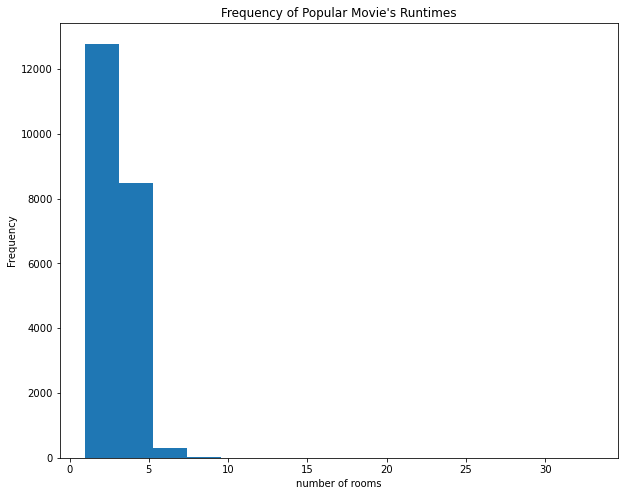

In [54]:
x = df['bedrooms']

fig, ax = plt.subplots(figsize=(10,8))

ax.hist(x, bins=15)
ax.set_xlabel('number of rooms')
ax.set_ylabel('Frequency')
ax.set_title("Frequency of Popular Movie's Runtimes")



In [61]:
# dropping bedroom rows with values >=7
X_num = df.select_dtypes(include=['float','int64'])
df_bedrooms = X_num.loc[(X_num['bedrooms'] < 6) & (X_num['bedrooms'] > 1)]
y = df_bedrooms['price']
df_bedrooms = df_bedrooms.drop(['price','yr_renovated','lat','long','zipcode','id'],axis=1)
df_bed_cons = sm.add_constant(df_bedrooms)
model_1 = sm.OLS(endog=y,exog=df_bed_cons).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.566
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     3051.
Date:                Mon, 24 Oct 2022   Prob (F-statistic):               0.00
Time:                        12:53:20   Log-Likelihood:            -2.9036e+05
No. Observations:               21067   AIC:                         5.807e+05
Df Residuals:                   21057   BIC:                         5.808e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          6.784e+06   1.36e+05     49.955      0.000    6.52e+06    7.05e+06
bedrooms      -7.421e+04   2528.838    -29.347      0.000   -7.92e+04   -6.93e+04
bathrooms       7.08e+04   3866.530     18.310      0.000    6.32e+04    7.84e+04
sqft_living     257.2745      4.999     51.466      0.000     247.476     267.073
sqft_lot          0.0414      0.056      0.739      0.460      -0.068       0.151
floors         5.917e+04   4107.587     14.404      0.000    5.11e+04    6.72e+04
sqft_above      -13.6665      4.932     -2.771      0.006     -23.333      -4.000
yr_built      -3513.2334     70.615    -49.752      0.000   -3651.644   -3374.823
sqft_living15    95.7083      3.801     25.178      0.000      88.257     103.159
sqft_lot15       -0.6786      0.086     -7.868      0.000      -0.848      -0.510
==============================================================================
Omnibus:                    13867.415   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           462656.497
Skew:                           2.684   Prob(JB):                         0.00
Kurtosis:                      25.322   Cond. No.                     4.24e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.24e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""